   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

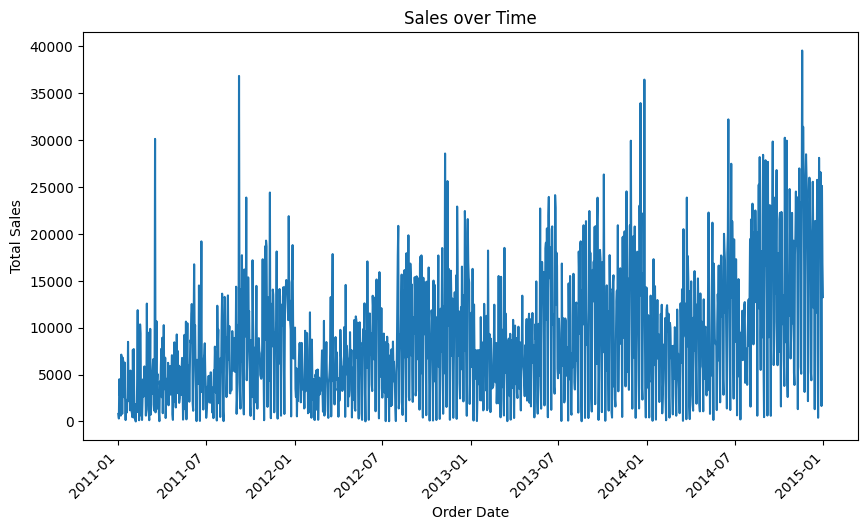

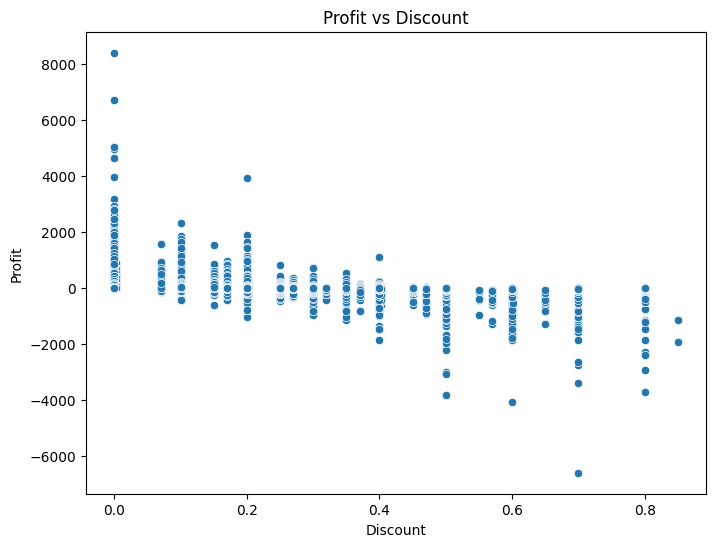

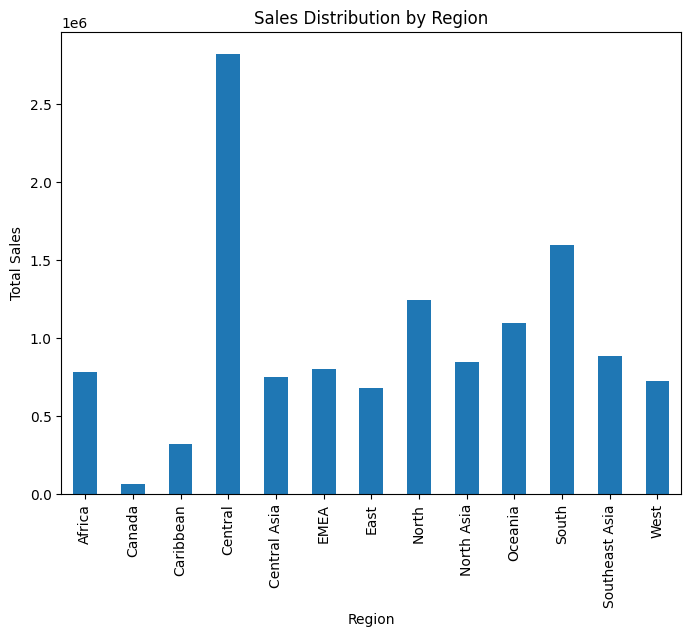

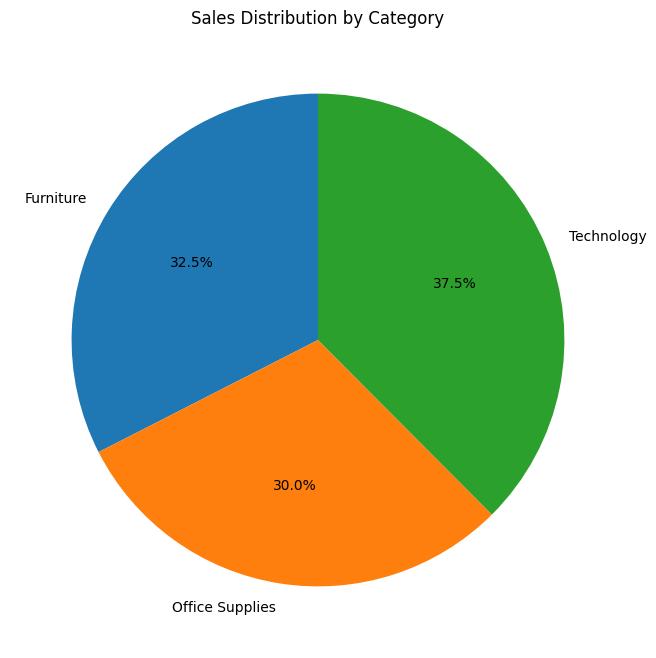

Mean Squared Error: 187787.80150462047
Coefficients: [  1.48311109 189.26580607]
Intercept: 176.0213437046341


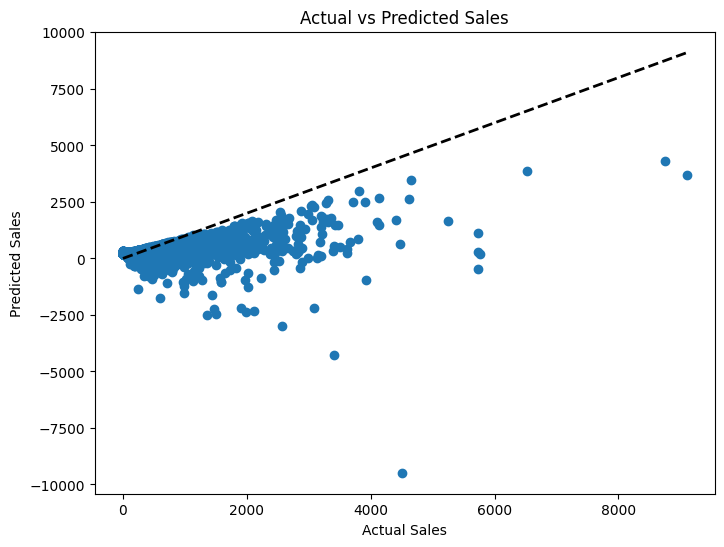

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Step 1: Dataset Selection
# Load the dataset (assuming it's in a CSV file called 'global_superstore.csv')
file_path = r'C:\Users\dell\Downloads\archive (4)\global_superstore.csv.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')  # You can also try 'ISO-8859-1' or 'cp1252'
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

# Proceed only if the dataset is loaded successfully
if df is not None:
    # Inspect the first few rows of the dataset
    print(df.head())

    # Step 2: Data Cleaning
    # Remove duplicate rows
    df = df.drop_duplicates()

    # Handle missing values by filling them with the mean or median
    if 'Sales' in df.columns:
        df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
    else:
        print("Column 'Sales' not found in the dataset.")

    if 'Profit' in df.columns:
        df['Profit'] = df['Profit'].fillna(df['Profit'].median())
    else:
        print("Column 'Profit' not found in the dataset.")

    if 'Discount' in df.columns:
        df['Discount'] = df['Discount'].fillna(df['Discount'].mean())
    else:
        print("Column 'Discount' not found in the dataset.")

    if 'Category' in df.columns:
        df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
    else:
        print("Column 'Category' not found in the dataset.")

    if 'Region' in df.columns:
        df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
    else:
        print("Column 'Region' not found in the dataset.")

    # Convert the 'Order Date' column to datetime format
    if 'Order Date' in df.columns:
        df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)  # Specify dayfirst=True
    else:
        print("Column 'Order Date' not found in the dataset.")

    # Step 3: Exploratory Data Analysis (EDA)
    if 'Sales' in df.columns and 'Order Date' in df.columns:
        # Plot time series graph for Sales over time
        plt.figure(figsize=(10,6))
        df.groupby('Order Date')['Sales'].sum().plot()
        plt.title('Sales over Time')
        plt.xlabel('Order Date')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.show()

    if 'Profit' in df.columns and 'Discount' in df.columns:
        # Scatter plot between Profit and Discount
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Discount', y='Profit')
        plt.title('Profit vs Discount')
        plt.xlabel('Discount')
        plt.ylabel('Profit')
        plt.show()

    if 'Region' in df.columns and 'Sales' in df.columns:
        # Visualize sales distribution by Region using a bar plot
        plt.figure(figsize=(8,6))
        df.groupby('Region')['Sales'].sum().plot(kind='bar')
        plt.title('Sales Distribution by Region')
        plt.xlabel('Region')
        plt.ylabel('Total Sales')
        plt.show()

    if 'Category' in df.columns and 'Sales' in df.columns:
        # Visualize sales distribution by Category using a pie chart
        category_sales = df.groupby('Category')['Sales'].sum()
        plt.figure(figsize=(8,8))
        category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title('Sales Distribution by Category')
        plt.ylabel('')
        plt.show()

    # Step 4: Predictive Modeling
    if 'Sales' in df.columns and 'Profit' in df.columns and 'Discount' in df.columns:
        # Select features and target
        X = df[['Profit', 'Discount']]  # Features
        y = df['Sales']  # Target

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model using Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')

        # Optional: Display the coefficients and intercept
        print(f'Coefficients: {model.coef_}')
        print(f'Intercept: {model.intercept_}')

        # Optional: Visualize the model's predictions vs actual values
        plt.figure(figsize=(8,6))
        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title('Actual vs Predicted Sales')
        plt.xlabel('Actual Sales')
        plt.ylabel('Predicted Sales')
        plt.show()
    else:
        print("Required columns for predictive modeling not found in the dataset.")
